In [6]:
import os
import io
import numpy as np
import platform
from PIL import ImageFont, ImageDraw, Image
import cv2
from google.cloud import vision
import matplotlib.pyplot as plt

In [8]:
def plt_imshow(title="image", img=None, figsize=(8, 5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [9]:
def putText(image, text, x, y, color=(0, 255, 0), font_size=22):
    if type(image) == np.ndarray:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(color_coverted)

    if platform.system() == "Darwin":
        font = "AppleGothic.ttf"
    elif platform.system() == "Windows":
        font = "malgun.ttf"
    else:
        font = "NanumGothic.ttf"

    image_font = ImageFont.truetype(font, font_size)
    font = ImageFont.load_default()
    draw = ImageDraw.Draw(image)

    draw.text((x, y), text, font=image_font, fill=color)

    numpy_image = np.array(image)
    opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)

    return opencv_image

In [13]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "../drugbox-service-account.json"

client_options = {"api_endpoint": "us-vision.googleapis.com"}
client = vision.ImageAnnotatorClient(client_options=client_options)

In [15]:
path = "../images/처방약_예시.jpeg"
with io.open(path, "rb") as image_file:
    content = image_file.read()

In [18]:
image = vision.Image(content=content)

response = client.text_detection(image=image)
texts = response.text_annotations

In [20]:
len(texts)

409


"약정보 더보기
약품이미지
홍길동님 1/
1999
조재일 2021.04.21 조제약사 AdminTest
약품명/성분
복약안내 / 복약만료일 2021.04.26
하이포티어스플러스점안액 기업정주세요
포비돈 50mg/mL
세라딘캡슐
세프라딘수화물500mg
[일] 주황HIP CEFRADINE 500
세라딘캡슐
세프라딘수화물500mg
[HIP CERADive 500
가리온정10mg
11KL A Tong
INT FREY MEL IN F
리바로정1mg
W 피타바스타틴칼슘수화물 1,100mg
[하하201
세트락살플러스점이액
신흥로플록사신염산염수화물 348mg/ml
플루오지용용아세토니트6mg/m
아세트아미노펜과
교복용하세요~
아세트아미노펜과교복용가능한 부루펜시
*단, 멕시부프로펜과 교차용 불가
약제비 계산서·영수증(별지 제11호서식]
| 필독약국
영수증번호 20200409-001
환자 성명 홍길동
조일자 2021.04.21 공휴
약제비총액 ①+2+@
본인부담금 ①
보험자부담금 ②
(비급여(본인) ③
카 드
[안구건조증 치료가능한 콘택트렌즈의
삼가세요 다른 점안제 투여시 5분 이상 간격두세요.
위장장애 주의
[항생제] 증상개선시전문가와 상의없이 투약 중단
마세요 설사,간호조상승, 발진이 나타날 수 있어요.
위장장에 주의
[증상개선시전문가와 상의없이 중단
하세요 실시간상승, 발진이나타날 수 있어요
웅진기계식주의
[알러지질환] 졸음이 볼수있으므로 운전
기계조작시 주의하세요 이 약의 투여기간 동안에는
가능한 금주하세요
임신계획 시 주의 근육통주의
[고지혈증약] 투어때때로 근육통이 나타날 수
있습니다. 황달,간기능이상징후가 있을시전문가와
상화
발진주의
[귀염주의
귀약
귀약정이용으로만 사용하세요. 다른
동시에 사용하지 마세요.
과
FORLEANS
02-1234-1234
위치 투약량 횟수 일수
163
163
163
163
163
163
Samil
밀까부루펜
수납금액 현
Ⓒ
신분확인번호
현금승인번호
사업자등록번호
사업장소재지
호
명
상
금
1일
물약은
① 아침
③ 저녁
1234567890

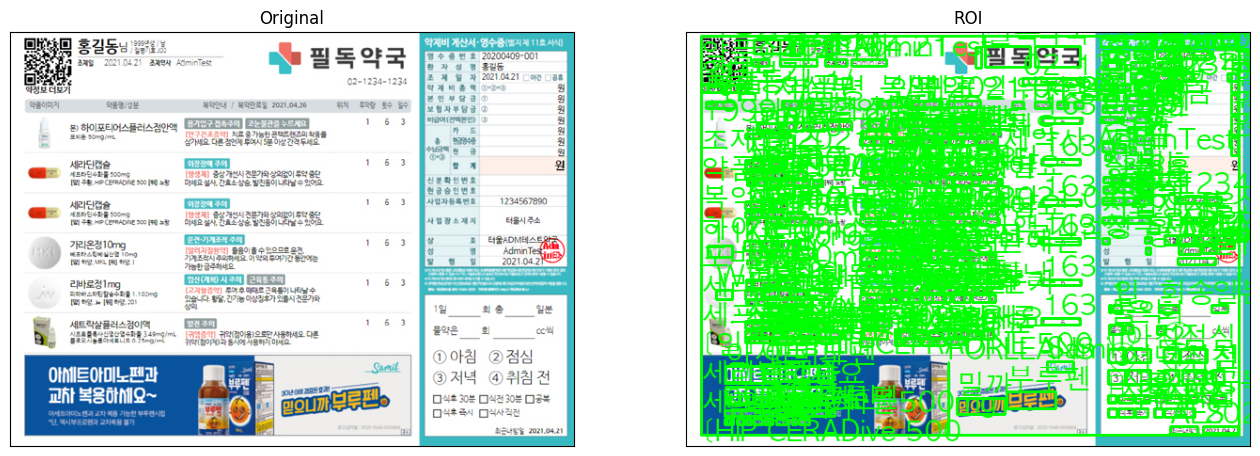

In [19]:
img = cv2.imread(path)
roi_img = img.copy()

for text in texts:
    print('\n"{}"'.format(text.description))

    vertices = ["({},{})".format(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices]

    ocr_text = text.description
    x1 = text.bounding_poly.vertices[0].x
    y1 = text.bounding_poly.vertices[0].y
    x2 = text.bounding_poly.vertices[1].x
    y2 = text.bounding_poly.vertices[2].y

    cv2.rectangle(roi_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    roi_img = putText(roi_img, ocr_text, x1, y1 - 30, font_size=30)

if response.error.message:
    raise Exception(
        "{}\nFor more info on error messages, check: "
        "https://cloud.google.com/apis/design/errors".format(response.error.message)
    )

plt_imshow(["Original", "ROI"], [img, roi_img], figsize=(16, 10))

In [22]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
import easyocr

reader = easyocr.Reader(["ko", "en"])  # this needs to run only once to load the model into memory
result = reader.readtext("../images/처방약_예시.jpeg")
print(result)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete[([[68, 4], [170, 4], [170, 30], [68, 30]], '총길동님 표-:', 0.04359036849124748), ([[439, 5], [591, 5], [591, 21], [439, 21]], '외지비거신서 영수히-기서기오 세세', 0.01813846895066386), ([[100, 30], [140, 30], [140, 38], [100, 38]], '2U2U: 2', 0.1239708952499507), ([[147, 29], [217, 29], [217, 41], [147, 41]], '소치유사 -rrles', 0.031816963980006725), ([[316, 14], [426, 14], [426, 46], [316, 46]], '필독약국', 0.8939129710197449), ([[440, 20], [488, 20], [488, 44], [440, 44]], '@ r량', 0.0029965578619018034), ([[499, 21], [565, 21], [565, 33], [499, 33]], '202004J9-001', 0.31370197478780865), ([[501, 33], [529, 33], [529, 45], [501, 45]], '$0등', 0.0037913524103602957), ([[357, 47], [425, 47], [425, 61], [357, 61]], '02-1234-1234', 0.2345628771900139), ([[499, 43], [587, 43], [587, 55], [499, 55]], '2021.0421 [어간 D8', 0.12026224853524604), ([[16, 58], [56, 58], [56, 66], [16, 66]], '미거나 내누', 0.03765751553498371), ([[444, 56], [474, 56], [

In [24]:
result[0]

([[68, 4], [170, 4], [170, 30], [68, 30]], '총길동님 표-:', 0.04359036849124748)

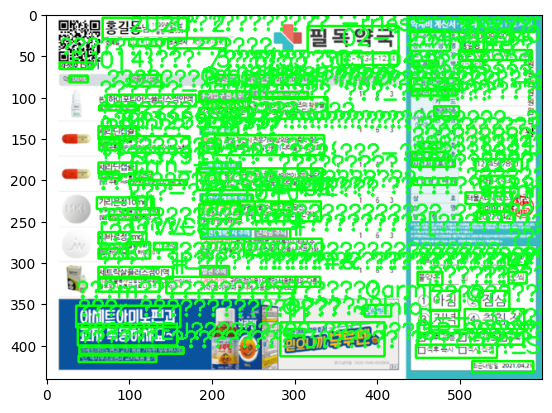

In [25]:
import cv2


def draw_bounding_boxes(image_path, result):
    # 이미지 파일 로드
    image = cv2.imread(image_path)
    for res in result:
        coordinates, text, _ = res
        # 좌표 추출
        top_left = tuple(coordinates[0])
        bottom_right = tuple(coordinates[2])
        # 이미지에 박스 그리기
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
        # 박스 위에 텍스트 표시
        cv2.putText(image, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # 이미지 표시
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()


# 사용 예
draw_bounding_boxes("../images/처방약_예시.jpeg", result)